## Proyecto 3. Entrega 3
### Regresion Lineal
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

#### Importaciones


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from pipeline import crear_pipeline_knn          

#### Carga y preparación de datos

In [ ]:
# Cargar dataset
df = pd.read_csv("../DataFinal.csv")

# Columnas categóricas
categoricas = ['Grupo de Edad', 'Año']
df[categoricas] = df[categoricas].astype(str)        

# Eliminar filas sin valor objetivo
df = df[df['Total Nacimientos'].notna()]

#### Variables (X / y) y One-Hot Encoding

In [4]:
y = df['Total Nacimientos']
X = df.drop(columns=['Total Nacimientos'])

X = pd.get_dummies(X, columns=categoricas, drop_first=True) 

#### División train / test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Creación y entrenamiento del pipeline (KNN básico)

In [6]:
modelo_knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)
pipeline = crear_pipeline_knn(modelo_knn)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor(weights='distance'))])

#### Evaluación del modelo (básico)

KNN básico:
MAE: 2701.696572228741
MSE: 16877291.49722138
RMSE: 4108.19808398054
R²: 0.9859665361391375


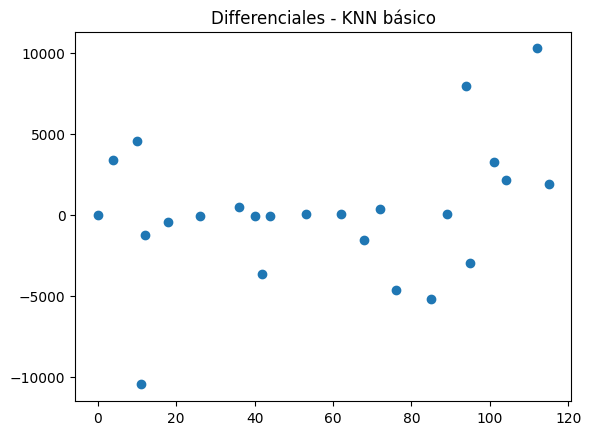

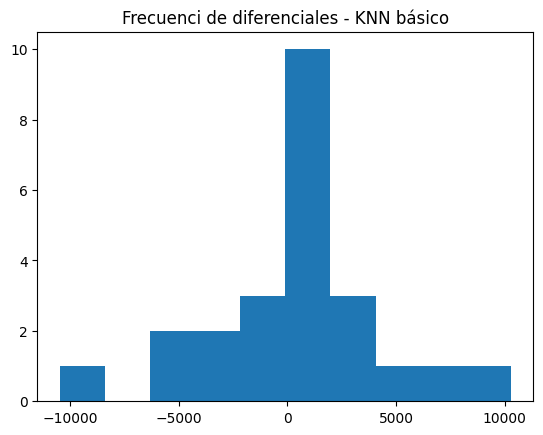

In [8]:
from error_metrics import calculate_errors, diff_analysis

y_pred = pipeline.predict(X_test)

calculate_errors(y_pred, y_test, "KNN básico")
diff_analysis(y_pred, y_test, "KNN básico")

#### Búsqueda de hiperparámetros (Grid Search)

In [ ]:
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]          
}

gs = GridSearchCV(
    crear_pipeline_knn(KNeighborsRegressor()),      
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gs.fit(X_train, y_train)

print("Mejores hiperparámetros:", gs.best_params_)
mejor_knn = gs.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Mejores hiperparámetros: {'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'uniform'}


#### Evaluación del mejor KNN


KNN optimizado:
MAE: 1935.9722222222226
MSE: 13390670.65740741
RMSE: 3659.3265305801024
R²: 0.9888656605371557


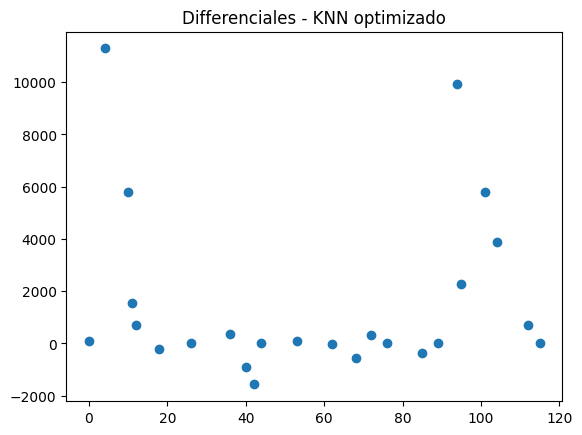

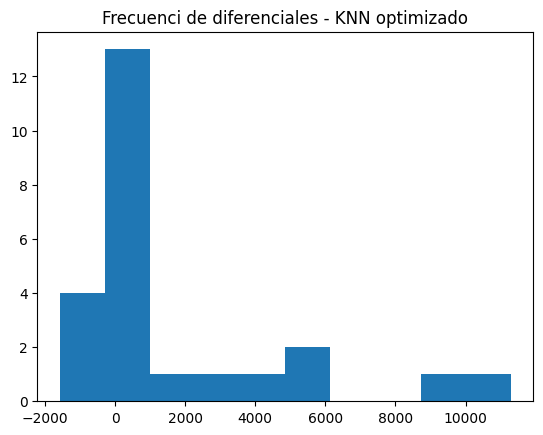

In [10]:
# Predicciones con los hiperparámetros óptimos
y_pred_opt = mejor_knn.predict(X_test)

# Métricas y análisis de diferencia
calculate_errors(y_pred_opt, y_test, "KNN optimizado")
diff_analysis(y_pred_opt, y_test, "KNN optimizado")


#### Gráfica: valor real vs. predicción (KNN optimizado)

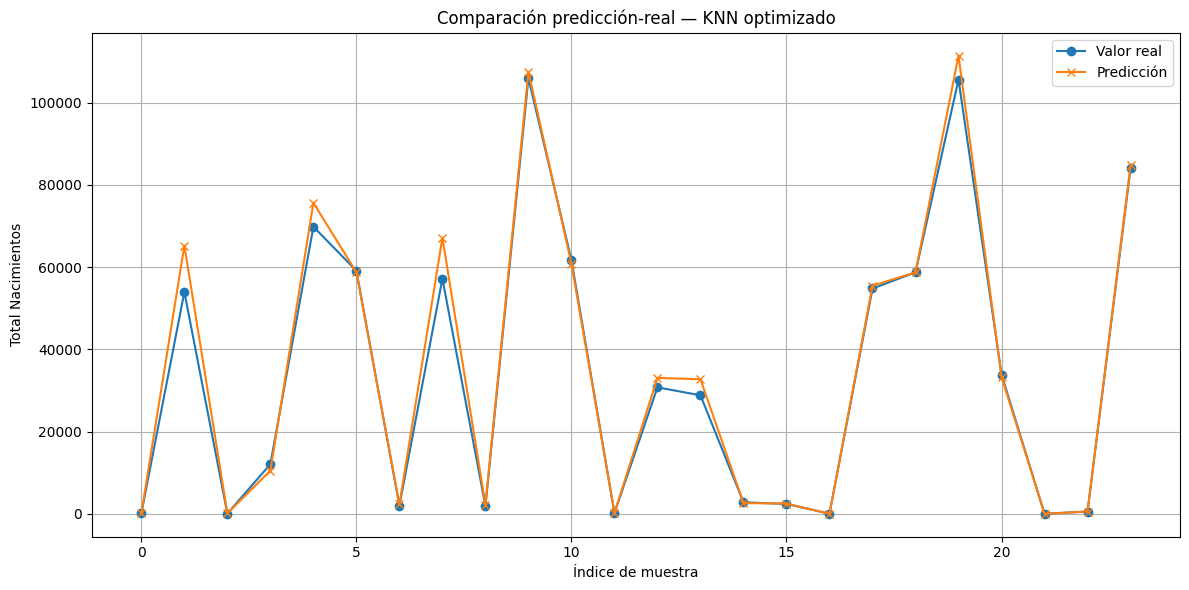

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Valor real', marker='o')
plt.plot(pd.Series(y_pred_opt, name="Predicción"), label='Predicción', marker='x')
plt.title('Comparación predicción-real — KNN optimizado')
plt.xlabel('Índice de muestra')
plt.ylabel('Total Nacimientos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()